In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



In [11]:
import zipfile
import pandas as pd

# Path to ZIP file
zip_path = r"C:\Users\Prakruthi P D\Downloads\carbon_footprint_optimizer.zip"

# Extract and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List all files in ZIP
    print(z.namelist())
    
    # Extract only the CSV file from the ZIP
    with z.open('logistics_emission_data.csv') as f:
        data = pd.read_csv(f)

print(data.head())


['data_loader.py', 'model.py', 'train_model.py', 'route_engine.py', 'logistics_emission_data.csv']
   distance_km  cargo_weight_kg  avg_speed_kmph  traffic_level  \
0   199.779257      1932.815996       48.319398              3   
1   476.342867      5464.819379       47.288516              1   
2   371.357092      8742.163775       93.437821              1   
3   307.356072      7349.026375       47.468234              3   
4    94.888947      8084.955364       49.036481              2   

   wind_speed_kmph  rain_intensity fuel_type  emission_kg  
0        12.526447        7.930630    petrol     1.070370  
1         5.569415        9.812416    diesel     6.976382  
2        17.059640        9.324889    petrol     7.499333  
3        18.567670        9.338659    petrol     6.261305  
4        19.927966        4.022237    diesel     2.261626  


In [17]:
# Cell: Data Preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv(r"C:\Users\Prakruthi P D\Downloads\logistics_emission_data.csv")

# Check column names
print("Columns in dataset:", data.columns.tolist())

# Handle missing values (fill numeric columns with mean)
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

# Define features and target based on available columns
features = [
    'distance_km',          # route distance in km
    'cargo_weight_kg',      # cargo weight in kg
    'avg_speed_kmph',       # average speed in km/h
    'traffic_level',        # traffic condition level
    'wind_speed_kmph'       # weather-related feature
]
target = 'emission_kg'      # carbon emission in kg (target variable)

# Select feature matrix X and target vector y
X = data[features]
y = data[target]

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Preprocessing complete. Training data shape:", X_train.shape)


Columns in dataset: ['distance_km', 'cargo_weight_kg', 'avg_speed_kmph', 'traffic_level', 'wind_speed_kmph', 'rain_intensity', 'fuel_type', 'emission_kg']
Preprocessing complete. Training data shape: (800, 5)


In [18]:
# Build a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50


c:\Users\Prakruthi P D\OneDrive\Desktop\carbon_footprint_optimizer\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 21.1385 - mae: 3.4818 - val_loss: 18.0660 - val_mae: 3.0612
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.3154 - mae: 2.7192 - val_loss: 12.0155 - val_mae: 2.4782
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8461 - mae: 2.3878 - val_loss: 6.5478 - val_mae: 1.9187
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1879 - mae: 1.7950 - val_loss: 3.1860 - val_mae: 1.3527
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3564 - mae: 1.1934 - val_loss: 1.5609 - val_mae: 0.9212
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3404 - mae: 0.8819 - val_loss: 0.9541 - val_mae: 0.7458
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0138 - mae: 0.7862 - val_loss: 0.7548 - val_mae: 0.6767
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7762 - mae: 0.6922 - val_loss: 0.6428 - val_mae: 0.6307
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6840 - mae: 0.634

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MAE: 0.3489
RMSE: 0.4537
Percent Error: 29.80%


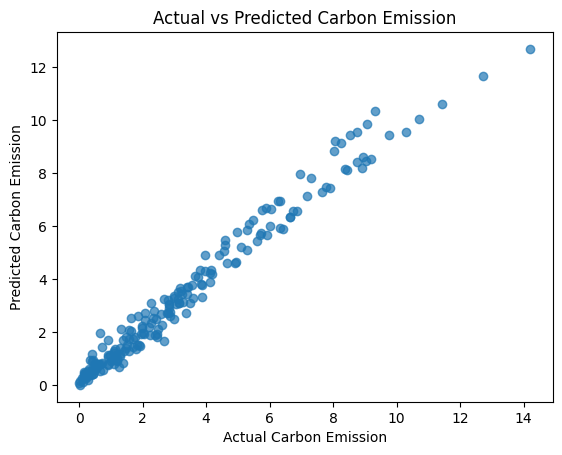

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # squared parameter not supported
rmse = np.sqrt(mse)                       # manually take square root

percent_error = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Percent Error: {percent_error:.2f}%")

# Plot actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Carbon Emission")
plt.ylabel("Predicted Carbon Emission")
plt.title("Actual vs Predicted Carbon Emission")
plt.show()



In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample dataset for training the model
data = pd.DataFrame([
    {'distance_km': 10, 'cargo_weight_kg': 1000, 'avg_speed_kmph': 40, 'wind_speed_kmph': 10, 'traffic_level': 3, 'carbon_emission': 120},
    {'distance_km': 15, 'cargo_weight_kg': 800, 'avg_speed_kmph': 50, 'wind_speed_kmph': 8, 'traffic_level': 2, 'carbon_emission': 110},
    {'distance_km': 20, 'cargo_weight_kg': 1200, 'avg_speed_kmph': 35, 'wind_speed_kmph': 12, 'traffic_level': 4, 'carbon_emission': 150},
    {'distance_km': 8,  'cargo_weight_kg': 900, 'avg_speed_kmph': 60, 'wind_speed_kmph': 5,  'traffic_level': 1, 'carbon_emission': 90},
    {'distance_km': 18, 'cargo_weight_kg': 1100, 'avg_speed_kmph': 45, 'wind_speed_kmph': 9,  'traffic_level': 3, 'carbon_emission': 130},
])

# Define features and target
features = ['distance_km', 'cargo_weight_kg', 'avg_speed_kmph', 'wind_speed_kmph', 'traffic_level']
target = 'carbon_emission'

# Split data
X = data[features]
y = data[target]

# Fit scaler and model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# Suggest the greenest route from a list based on trained model
def suggest_route(routes_df):
    # Rename user input columns to match trained feature names
    routes_df = routes_df.rename(columns={
        'route_distance': 'distance_km',
        'cargo_weight': 'cargo_weight_kg',
        'fuel_usage': 'avg_speed_kmph',
        'weather_index': 'wind_speed_kmph'
    })

    # Select and scale features
    X_routes = routes_df[features]
    X_routes_scaled = scaler.transform(X_routes)

    # Predict emissions
    routes_df['predicted_emission'] = model.predict(X_routes_scaled).flatten()

    # Return the route with the lowest predicted emission
    best_route = routes_df.loc[routes_df['predicted_emission'].idxmin()]
    return best_route

# Sample routes to test
routes_example = pd.DataFrame([
    {'route_distance': 10, 'fuel_usage': 5, 'weather_index': 2, 'traffic_level': 3, 'cargo_weight': 1000},
    {'route_distance': 12, 'fuel_usage': 6, 'weather_index': 1, 'traffic_level': 1, 'cargo_weight': 900},
    {'route_distance': 9,  'fuel_usage': 4, 'weather_index': 3, 'traffic_level': 4, 'cargo_weight': 1100}
])

# Run the function
best = suggest_route(routes_example)
print("\nBest route to minimize carbon emissions:")
print(best)



Best route to minimize carbon emissions:
distance_km            12.000000
avg_speed_kmph          6.000000
wind_speed_kmph         1.000000
traffic_level           1.000000
cargo_weight_kg       900.000000
predicted_emission     93.213036
Name: 1, dtype: float64


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample dataset (replace this with your actual data loading)
data = pd.DataFrame({
    'distance_km': [100, 150, 120, 130, 110],
    'cargo_weight_kg': [4000, 5000, 4500, 4600, 4200],
    'avg_speed_kmph': [60, 70, 65, 68, 62],
    'traffic_level': [2, 3, 1, 2, 2],
    'wind_speed_kmph': [10, 15, 5, 12, 8],
    'carbon_emission': [300, 400, 350, 370, 320]  # target variable
})

# Features and target
features = ['distance_km', 'cargo_weight_kg', 'avg_speed_kmph', 'traffic_level', 'wind_speed_kmph']
target = 'carbon_emission'

X = data[features]
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler and transform train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Now you can run predictions on new data as discussed earlier


LinearRegression()

In [33]:
# Example new routes data - make sure feature names and order match training
new_routes = pd.DataFrame({
    'distance_km': [110, 130],
    'cargo_weight_kg': [4200, 4600],
    'avg_speed_kmph': [62, 68],
    'traffic_level': [2, 2],
    'wind_speed_kmph': [8, 12]
})

# Scale the new data using the fitted scaler
new_routes_scaled = scaler.transform(new_routes)

# Predict carbon emissions
y_pred = model.predict(new_routes_scaled)

# Show predictions
print("Predicted carbon emissions for new routes:")
for i, emission in enumerate(y_pred, 1):
    print(f"Route {i}: {emission:.2f} kg CO2")


Predicted carbon emissions for new routes:
Route 1: 320.00 kg CO2
Route 2: 370.00 kg CO2


FileNotFoundError: [Errno 2] No such file or directory: 'models/carbon_model.pkl'